# Data Preparation

In [66]:
# Import the necessary packages

# Native Python Packages



#Third Party Packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

In [2]:
# Create DataFrame
prv_train = pd.read_csv("Data/Perovskite_train.csv")

# Display
print("Total number of results:", len(prv_train))
display(prv_train.head()) # Using display instead of print leads to a neater output

Total number of results: 4165


v(A)  v(B)  r(AXII)(Å)  r(AVI)(Å)  r(BVI)(Å)  EN(A)  EN(B)  l(A-O)(Å)  \
0     0     0        0.52       0.52       0.93   2.18   2.54   2.214685   
1     0     0        1.03       0.86       0.60   1.27   1.90   2.500930   
2     2     4        0.92       0.67       0.53   1.83   1.88   2.290644   
3     1     5        1.64       1.38       0.62   0.82   2.36   3.025719   
4     0     0        0.57       0.57       0.71   2.20   1.30   2.300109   

   l(B-O)(Å)      ΔENR        tG         τ         μ Lowest distortion  
0   2.313698 -1.728214  0.582680  0.000000  0.664286             cubic  
1   0.000000 -1.768643  0.859135  0.000000  0.428571             cubic  
2   1.930311 -1.468464  0.849994  4.936558  0.378571             cubic  
3   1.745600 -1.974429  1.064161  3.977376  0.442857      orthorhombic  
4   2.027412 -1.622357  0.660190  0.000000  0.507143             cubic

In [3]:
# Rename columns in prv_train DataFrame 
#(pep8 standard, a line of code should not exceed 79 characters
#so each renaming is it's own line)
prv_train = prv_train.rename(columns={'v(A)': 'vA'})
prv_train = prv_train.rename(columns={'v(B)': 'vB'})
prv_train = prv_train.rename(columns={'r(AXII)(Å)': 'r_A12'})
prv_train = prv_train.rename(columns={'r(AVI)(Å)': 'r_A6'})
prv_train = prv_train.rename(columns={'r(BVI)(Å)': 'r_B6'})
prv_train = prv_train.rename(columns={'EN(A)': 'EN_A'})
prv_train = prv_train.rename(columns={'EN(B)': 'EN_B'})
prv_train = prv_train.rename(columns={'l(A-O)(Å)': 'bond_len_AO'})
prv_train = prv_train.rename(columns={'l(B-O)(Å)': 'bond_len_BO'})
prv_train = prv_train.rename(columns={'ΔENR': 'EN_diff'})
prv_train = prv_train.rename(columns={'τ': 'tau'})
prv_train = prv_train.rename(columns={'μ': 'mu'})
prv_train = prv_train.rename(columns={'Lowest distortion': 'lowest_distortion'})

In [4]:
# Get summary
display(prv_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vA                 4165 non-null   int64  
 1   vB                 4165 non-null   int64  
 2   r_A12              4165 non-null   float64
 3   r_A6               4165 non-null   float64
 4   r_B6               4165 non-null   float64
 5   EN_A               4165 non-null   float64
 6   EN_B               4165 non-null   float64
 7   bond_len_AO        4165 non-null   float64
 8   bond_len_BO        4165 non-null   float64
 9   EN_diff            4165 non-null   float64
 10  tG                 4165 non-null   float64
 11  tau                4165 non-null   float64
 12  mu                 4165 non-null   float64
 13  lowest_distortion  4165 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 455.7+ KB


None

List of Feature (or attributes, either work) Descriptions

- v(A) - Valence of A
- v(B) - Valence of B
- Radius A (r(A)) - ionic radius of A cation (A6)
- Radius A (r(A)) - ionic radius of A cation (a second one, A12)
- Radius B (r(B)) - ionic radius of B cation
- Electronegativity of A (EN(A)) - Average electronegativity value of A cation
- Electronegativity of B (EN(B)) - Average electronegativity value of B cation
- l(A-O) - Bond length of A-O pair
- l(B-O) - Bond length of B-O pair
- ΔENR - Electronegativity difference with radius
- tG - Goldschmidt tolerance factor
- τ New tolerance factor
- Μ - Octahedral factor


$$\tau = \frac{r_A + r_B}{\sqrt{2}(r_O) + l_{B-O} - l_{A-O}}$$
- r<sub>A</sub> is the ionic radius of the A-site cation.
- r<sub>B</sub> is the ionic radius of the B-site cation.
- r<sub>O</sub> is the radius of the oxygen ion.
- l<sub>A-O</sub> is the bond length of the A-O pair.
- l<sub>B-O</sub> is the bond length of the B-O pair.

\[
\begin{align*}
\tau &= \frac{r_A + r_B}{\sqrt{2}(r_O) + l_{B-O} - l_{A-O}}
\end{align*}
\]

\[
\begin{array}{c}
- r_A \text{ is the ionic radius of the A-site cation.} \\
- r_B \text{ is the ionic radius of the B-site cation.} \\
- r_O \text{ is the radius of the oxygen ion.} \\
- l_{A-O} \text{ is the bond length of the A-O pair.} \\
- l_{B-O} \text{ is the bond length of the B-O pair.}
\end{array}
\]


Mathematically, the Goldschmidt tolerance factor (tG) is given by:

$$ t_G = \frac{r_A + r_B}{2(r_O)} $$

Where:

- \( r_A \) is the ionic radius of the A-site cation.
- \( r_B \) is the ionic radius of the B-site cation.
- \( r_O \) is the radius of the oxygen ion.


side quest (because it is interesting) use latex to write formulas. use the data to derive formulas to prove ... treat the raw data as experimental data and verify that these relationships are true.

the formulas give context :) this is extra data that many times won't have. 

In [5]:
# Select columns with data type 'object'
string_col = prv_train.select_dtypes(include="object").columns

# Convert selected columns to the 'string' data type
prv_train[string_col] = prv_train[string_col].astype("string")


In [6]:
# Get summary
display(prv_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vA                 4165 non-null   int64  
 1   vB                 4165 non-null   int64  
 2   r_A12              4165 non-null   float64
 3   r_A6               4165 non-null   float64
 4   r_B6               4165 non-null   float64
 5   EN_A               4165 non-null   float64
 6   EN_B               4165 non-null   float64
 7   bond_len_AO        4165 non-null   float64
 8   bond_len_BO        4165 non-null   float64
 9   EN_diff            4165 non-null   float64
 10  tG                 4165 non-null   float64
 11  tau                4165 non-null   float64
 12  mu                 4165 non-null   float64
 13  lowest_distortion  4165 non-null   string 
dtypes: float64(11), int64(2), string(1)
memory usage: 455.7 KB


None

The object data has been converted to string. 

It appears there are two measurements for the radius of the A cation, labeled as "r(AXII)(Å)" and "r(AVI)(Å)". This duplication could be due to different conventions or sources of data.

Here's a potential explanation for why there might be two A radius measurements in technical terms:

Different Coordination Numbers (CN):

"r(AXII)(Å)" and "r(AVI)(Å)" might represent the ionic radius of the A cation under different coordination environments.
The notation "AXII" could indicate a coordination number of 12 (dodecahedral coordination), while "AVI" could indicate a coordination number of 6 (octahedral coordination).

In short, when considering the context of perovskite structures, the radius for a perovskite could be 6 or 12 angstroms due to the variations in the arrangement and composition of the atoms within the crystal lattice.

In laymen's terms:(with help from wikipedia)

Simple Structure: Where the perovskite structure follows the ABX3 formula precisely, the radius could be 6 angstroms. This simple structure consists of specific arrangements of atoms where the 'A' atom (usually larger) is surrounded by an octahedron of oxygen atoms, and the 'B' atom (usually smaller) sits at the center of the octahedron.

Complex Structures: Perovskites can also have more complex arrangements, especially when there are variations or substitutions in the 'A' and 'B' sites. For example, in ordered double perovskites like A2BB’O6, or in disordered perovskites like A(BB’)O3, the arrangement of atoms can differ, leading to variations in the radius. In such cases, the radius could be larger, around 12 angstroms, due to changes in the atomic arrangement and coordination.

Basically, there are two columns due to atomic arrangements; factors such as the types of ions present, their sizes, and their positions within the crystal lattice can influence the overall size of the perovskite structure. These variations in atomic arrangements and compositions can lead to different radii for perovskite structures.



In [7]:
# Create a copy of the DataFrame to avoid altering the original
prv_train_num = prv_train.copy()

# Select columns with data type 'string'
string_col=prv_train_num.select_dtypes("string").columns.to_list()

In [8]:
# Extract column names of prv_train_num DataFrame and store them in num_col
num_col = prv_train_num.columns.to_list()

# Remove columns identified as string columns from num_col
#for col in string_col:
#    num_col.remove(col)

# Remove the column "Lowest distortion" from num_col
num_col.remove("lowest_distortion")
print(num_col)
# For my project this doesn't really remove anything, but
#if there were hundreds of columns then the strings would get 
# in the way of the data describe and so generally they would 
#be removed this way before describing the data.

['vA', 'vB', 'r_A12', 'r_A6', 'r_B6', 'EN_A', 'EN_B', 'bond_len_AO', 'bond_len_BO', 'EN_diff', 'tG', 'tau', 'mu']


In [9]:
# This line generates a summary statistics table for the DataFrame prv_train_num.
# The `.describe()` method calculates summary statistics for numerical columns by default.

# The `.T` at the end is a transpose operation, which swaps the rows and columns of the summary statistics table.
# This operation is performed to make the table more readable, with variables as rows and summary statistics as columns.
# It essentially transposes the DataFrame, swapping rows and columns.
# This is often done to have a better visual representation of the data, especially when there are many columns.

prv_train_num.describe().T

count      mean        std         min       25%       50%  \
vA           4165.0  0.882353   1.672111   -1.000000 -1.000000  0.000000   
vB           4165.0  1.385114   2.161707   -1.000000 -1.000000  0.000000   
r_A12        4165.0  1.005570   0.336940    0.270000  0.730000  0.980000   
r_A6         4165.0  0.841789   0.240549    0.270000  0.670000  0.860000   
r_B6         4165.0  0.801999   0.234891    0.270000  0.630000  0.760000   
EN_A         4165.0  1.547309   0.447277    0.790000  1.200000  1.500000   
EN_B         4165.0  1.599059   0.442961    0.790000  1.220000  1.600000   
bond_len_AO  4165.0  2.323011   0.635699    0.000000  2.294004  2.422517   
bond_len_BO  4165.0  2.017219   0.555599    0.000000  1.956808  2.075849   
EN_diff      4165.0 -2.186093   0.636470   -5.411536 -2.570036 -2.084214   
tG           4165.0  0.781040   0.135816    0.384648  0.680809  0.776944   
tau          4165.0  1.332182  20.804362 -480.827696  0.000000  0.000000   
mu           4165.0  0.572857   0.167778    0.192857  0.450000  0.542857   

                  75%         max  
vA           2.000000    5.000000  
vB           3.000000    5.000000  
r_A12        1.240000    1.880000  
r_A6         0.960000    1.670000  
r_B6         0.940000    1.670000  
EN_A         1.910000    2.540000  
EN_B         1.960000    2.540000  
bond_len_AO  2.582926    3.300176  
bond_len_BO  2.284156    3.009747  
EN_diff     -1.734643   -0.601714  
tG           0.873123    1.321062  
tau          3.892903  305.871348  
mu           0.671429    1.192857

The zeros in Tau could be a problem. The max is also 305 with a mean of 1.3. Further investigation is needed. This column may need to be dropped.

EN(A) and (B) have the same values indicating that they are distributed the same. 

Some of the bond lengths are also showing zero and will need to be investigated.

If the valence(A) and (B) are both zero, in this dataset, it implies that both cations (A and B) are essentially neutral, meaning they have no charge. This scenario is highly unlikely and not physically meaningful in the context of perovskite compounds because A and B cations typically have non-zero valence states to contribute to the overall charge balance of the compound.

Therefore, in this dataset, the occurrence of both A and B having zero valence is likely an artifact or error rather than a meaningful data point. It's important to review the data and ensure its integrity, as such an occurrence may indicate issues with data collection or processing. These occurances may have to be dropped.

In [10]:
zero_counts = prv_train.apply(lambda col: (col == 0).sum())
print("Count of zeros in each column:")
print(zero_counts)

Count of zeros in each column:
vA                    859
vB                    859
r_A12                   0
r_A6                    0
r_B6                    0
EN_A                    0
EN_B                    0
bond_len_AO           254
bond_len_BO           243
EN_diff                 0
tG                      0
tau                  2177
mu                      0
lowest_distortion       0
dtype: int64


The \( \tau \) column, representing the New tolerance factor, is helpful for several reasons:

1. **Structural Stability Assessment**: The New tolerance factor (\( \tau \)) provides insight into the structural stability of perovskite compounds. It considers the ionic radii of the A and B cations and the oxygen ion as well as the bond lengths between these ions. By incorporating bond lengths, \( \tau \) offers a comprehensive assessment of the compound's structural stability compared to the traditional Goldschmidt tolerance factor (\( t_G \)).

2. **Prediction of Crystal Structures**: \( \tau \) can be used as a predictive metric to estimate the likelihood of specific crystal structures in perovskite compounds. Different crystal structures, such as cubic, tetragonal, orthorhombic, and rhombohedral, may have characteristic ranges of \( \tau \) values. Therefore, analyzing \( \tau \) alongside experimental data can help researchers predict or identify the most probable crystal structure of a perovskite compound.

3. **Guidance for Materials Design**: Understanding the relationship between \( \tau \) and crystal structures can guide scientists in designing new perovskite materials with desired properties. By manipulating factors that influence \( \tau \), such as cation ionic radii and bond lengths, researchers can tailor the crystal structure of perovskite compounds to achieve specific functional properties, such as electronic, magnetic, or optical behavior.

4. **Comparative Analysis**: \( \tau \) allows for comparative analysis between different perovskite compounds or compositions. Researchers can use \( \tau \) to compare the structural stability of various perovskite materials and identify trends or correlations between \( \tau \) values and other material properties. This comparative analysis can inform the selection of perovskite compositions for specific applications or research objectives.

So it would be worth our time to investigate the effectiveness of the model both with and without Tau.


In [11]:
# Create a copy of the DataFrame to avoid altering the original
prv_train_tau = prv_train.copy()

# Drop rows with zero values
prv_train_tau = prv_train_tau[prv_train_tau['tau'] != 0]

# Display
print("Total number of results:", len(prv_train_tau))
display(prv_train_tau.head())

Total number of results: 1988


vA  vB  r_A12  r_A6  r_B6  EN_A  EN_B  bond_len_AO  bond_len_BO   EN_diff  \
2    2   4   0.92  0.67  0.53  1.83  1.88     2.290644     1.930311 -1.468464   
3    1   5   1.64  1.38  0.62  0.82  2.36     3.025719     1.745600 -1.974429   
6    1   5   0.92  0.80  0.62  1.78  2.36     2.392362     1.745600 -1.484143   
10   3   3   1.36  1.03  0.90  1.10  1.23     2.689119     2.258656 -2.931286   
11   2   4   1.19  0.99  0.61  1.22  1.54     2.550861     1.927849 -2.040571   

          tG       tau        mu lowest_distortion  
2   0.849994  4.936558  0.378571             cubic  
3   1.064161  3.977376  0.442857      orthorhombic  
6   0.812123  5.017992  0.442857             cubic  
10  0.848528  3.536265  0.642857      orthorhombic  
11  0.911148  4.133678  0.435714      orthorhombic

In [12]:
zero_counts = prv_train_tau.apply(lambda col: (col == 0).sum())
print("Count of zeros in each column:")
print(zero_counts)

Count of zeros in each column:
vA                   0
vB                   0
r_A12                0
r_A6                 0
r_B6                 0
EN_A                 0
EN_B                 0
bond_len_AO          0
bond_len_BO          0
EN_diff              0
tG                   0
tau                  0
mu                   0
lowest_distortion    0
dtype: int64


In [13]:
# Create a copy of the DataFrame to avoid altering the original
prv_train_no_tau = prv_train.copy()

# Drop tau column
prv_train_no_tau.drop(['tau'], axis=1, inplace=True)

# Display
print("Total number of results:", len(prv_train_no_tau))
display(prv_train_no_tau.head())

Total number of results: 4165


vA  vB  r_A12  r_A6  r_B6  EN_A  EN_B  bond_len_AO  bond_len_BO   EN_diff  \
0   0   0   0.52  0.52  0.93  2.18  2.54     2.214685     2.313698 -1.728214   
1   0   0   1.03  0.86  0.60  1.27  1.90     2.500930     0.000000 -1.768643   
2   2   4   0.92  0.67  0.53  1.83  1.88     2.290644     1.930311 -1.468464   
3   1   5   1.64  1.38  0.62  0.82  2.36     3.025719     1.745600 -1.974429   
4   0   0   0.57  0.57  0.71  2.20  1.30     2.300109     2.027412 -1.622357   

         tG        mu lowest_distortion  
0  0.582680  0.664286             cubic  
1  0.859135  0.428571             cubic  
2  0.849994  0.378571             cubic  
3  1.064161  0.442857      orthorhombic  
4  0.660190  0.507143             cubic

In [14]:
zero_counts = prv_train_no_tau.apply(lambda col: (col == 0).sum())
print("Count of zeros in each column:")
print(zero_counts)

Count of zeros in each column:
vA                   859
vB                   859
r_A12                  0
r_A6                   0
r_B6                   0
EN_A                   0
EN_B                   0
bond_len_AO          254
bond_len_BO          243
EN_diff                0
tG                     0
mu                     0
lowest_distortion      0
dtype: int64


should these zero values be left to skew the data to be incorrect or should they be dropped? vA and vB are crucial factors so zero values for those features would really not give any meaningful results. The dataset could be split here but then there would be multiple analyses on various datasets and not evaluations of various machine learning models. so these values will be dropped to limit the number of datasets and maximize the number of machine learning models ...

In [15]:
# Drop rows with zero values
prv_train_no_tau = prv_train_no_tau[prv_train_no_tau['vA'] != 0]

# Display
print("Total number of results:", len(prv_train_no_tau))
display(prv_train_no_tau.head())

Total number of results: 3306


vA  vB  r_A12  r_A6  r_B6  EN_A  EN_B  bond_len_AO  bond_len_BO   EN_diff  \
2    2   4   0.92  0.67  0.53  1.83  1.88     2.290644     1.930311 -1.468464   
3    1   5   1.64  1.38  0.62  0.82  2.36     3.025719     1.745600 -1.974429   
6    1   5   0.92  0.80  0.62  1.78  2.36     2.392362     1.745600 -1.484143   
10   3   3   1.36  1.03  0.90  1.10  1.23     2.689119     2.258656 -2.931286   
11   2   4   1.19  0.99  0.61  1.22  1.54     2.550861     1.927849 -2.040571   

          tG        mu lowest_distortion  
2   0.849994  0.378571             cubic  
3   1.064161  0.442857      orthorhombic  
6   0.812123  0.442857             cubic  
10  0.848528  0.642857      orthorhombic  
11  0.911148  0.435714      orthorhombic

In [16]:
zero_counts = prv_train_no_tau.apply(lambda col: (col == 0).sum())
print("Count of zeros in each column:")
print(zero_counts)

Count of zeros in each column:
vA                   0
vB                   0
r_A12                0
r_A6                 0
r_B6                 0
EN_A                 0
EN_B                 0
bond_len_AO          0
bond_len_BO          0
EN_diff              0
tG                   0
mu                   0
lowest_distortion    0
dtype: int64


where vA is zero, it appears that vB and also bond_len_AO and bond_len_BO are all also zero. so only the zeros from vA needed to be dropped.

##Correlation Matrix
Lighter shades represents positive correlation
Darker shades represents negative correlation

In [17]:
# How many values in vA and vB are -1?
#len(prv_train_no_tau[(prv_train_no_tau['vA'] == -1)])

# Accessing -1 values 
#print('Total number of results:', len(prv_train_no_tau[prv_train_no_tau.duplicated(['title'], keep=False)]))
#prv_train_no_tau[prv_train_no_tau.duplicated(['vA'], keep=False)].head()

prv_train_no_tau.loc[prv_train_no_tau['vA'] == -1]


vA  vB  r_A12  r_A6  r_B6  EN_A  EN_B  bond_len_AO  bond_len_BO  \
20    -1  -1   1.24  0.96  0.99  1.17  1.22     2.611965     2.255581   
21    -1  -1   1.70  1.20  0.80  1.62  1.78     2.531967     2.147681   
23    -1  -1   0.27  0.27  0.27  2.04  2.04     1.891523     1.624662   
24    -1  -1   0.63  0.63  0.90  2.20  2.02     2.311295     2.215655   
30    -1  -1   0.90  0.63  1.52  1.88  0.82     2.233563     2.825997   
...   ..  ..    ...   ...   ...   ...   ...          ...          ...   
4137  -1  -1   0.68  0.68  0.90  2.05  2.02     2.361079     2.215655   
4142  -1  -1   0.45  0.45  1.11  1.57  2.00     2.178342     2.323655   
4143  -1  -1   0.87  0.75  0.62  1.36  1.55     2.417029     2.169994   
4146  -1  -1   1.03  0.86  0.77  1.27  2.10     2.500930     2.115492   
4148  -1  -1   0.54  0.54  0.94  1.61  1.30     2.186789     2.246056   

       EN_diff        tG        mu lowest_distortion  
20   -3.002036  0.781072  0.707143             cubic  
21   -2.510714  0.996378  0.571429      orthorhombic  
23   -0.601714  0.707107  0.192857             cubic  
24   -1.823786  0.624099  0.642857             cubic  
30   -3.556429  0.556968  1.085714      rhombohedral  
...        ...       ...       ...               ...  
4137 -1.897357  0.639470  0.642857             cubic  
4142 -2.336464  0.521174  0.792857             cubic  
4143 -1.809536  0.794620  0.442857             cubic  
4146 -2.035679  0.791829  0.550000             cubic  
4148 -2.181929  0.586234  0.671429             cubic  

[1299 rows x 13 columns]

this might be two data sets combined. One data set has valence electrons reported for each entry and a tau calculation. Another data set that doesn't contain valence electrons or a calculated tau value. 

In [18]:
# Drop rows with -1 values
prv_train_no_tau = prv_train_no_tau[prv_train_no_tau['vA'] != -1]

# Display
print("Total number of results:", len(prv_train_no_tau))
display(prv_train_no_tau.head())

Total number of results: 2007


vA  vB  r_A12  r_A6  r_B6  EN_A  EN_B  bond_len_AO  bond_len_BO   EN_diff  \
2    2   4   0.92  0.67  0.53  1.83  1.88     2.290644     1.930311 -1.468464   
3    1   5   1.64  1.38  0.62  0.82  2.36     3.025719     1.745600 -1.974429   
6    1   5   0.92  0.80  0.62  1.78  2.36     2.392362     1.745600 -1.484143   
10   3   3   1.36  1.03  0.90  1.10  1.23     2.689119     2.258656 -2.931286   
11   2   4   1.19  0.99  0.61  1.22  1.54     2.550861     1.927849 -2.040571   

          tG        mu lowest_distortion  
2   0.849994  0.378571             cubic  
3   1.064161  0.442857      orthorhombic  
6   0.812123  0.442857             cubic  
10  0.848528  0.642857      orthorhombic  
11  0.911148  0.435714      orthorhombic

The valence electrons should add up to 6. A -1 value seems to be used as a placeholder. Drop all rows with a -1 value. 

Next, let's take a look at maximizing the number of data points. What would the data set look like if the valence electron columns and the tau column were dropped? Would there be any zeros left in the data set?

In [19]:
# Create a copy of the DataFrame to avoid altering the original
prv_train_no_tau_no_v = prv_train.copy()

# Drop tau column
prv_train_no_tau_no_v.drop(['tau', 'vA', 'vB'], axis=1, inplace=True)

# Display
print("Total number of results:", len(prv_train_no_tau_no_v))
display(prv_train_no_tau_no_v.head())

Total number of results: 4165


r_A12  r_A6  r_B6  EN_A  EN_B  bond_len_AO  bond_len_BO   EN_diff  \
0   0.52  0.52  0.93  2.18  2.54     2.214685     2.313698 -1.728214   
1   1.03  0.86  0.60  1.27  1.90     2.500930     0.000000 -1.768643   
2   0.92  0.67  0.53  1.83  1.88     2.290644     1.930311 -1.468464   
3   1.64  1.38  0.62  0.82  2.36     3.025719     1.745600 -1.974429   
4   0.57  0.57  0.71  2.20  1.30     2.300109     2.027412 -1.622357   

         tG        mu lowest_distortion  
0  0.582680  0.664286             cubic  
1  0.859135  0.428571             cubic  
2  0.849994  0.378571             cubic  
3  1.064161  0.442857      orthorhombic  
4  0.660190  0.507143             cubic

In [20]:
zero_counts = prv_train_no_tau_no_v.apply(lambda col: (col == 0).sum())
print("Count of zeros in each column:")
print(zero_counts)

Count of zeros in each column:
r_A12                  0
r_A6                   0
r_B6                   0
EN_A                   0
EN_B                   0
bond_len_AO          254
bond_len_BO          243
EN_diff                0
tG                     0
mu                     0
lowest_distortion      0
dtype: int64


Domain knowledge says that bond lengths cannot be zero so these values must be dropped. Also note that the bond length counts are different and may not occur in the same rows. The number of zero values is low so it is acceptable to drop these values.

In [21]:
# Drop rows with 0 values
prv_train_no_tau_no_v = prv_train_no_tau_no_v[prv_train_no_tau_no_v['bond_len_AO'] > 0]
prv_train_no_tau_no_v = prv_train_no_tau_no_v[prv_train_no_tau_no_v['bond_len_BO'] > 0]

# Display
print("Total number of results:", len(prv_train_no_tau_no_v))
display(prv_train_no_tau_no_v.head())


Total number of results: 3682


r_A12  r_A6  r_B6  EN_A  EN_B  bond_len_AO  bond_len_BO   EN_diff  \
0   0.52  0.52  0.93  2.18  2.54     2.214685     2.313698 -1.728214   
2   0.92  0.67  0.53  1.83  1.88     2.290644     1.930311 -1.468464   
3   1.64  1.38  0.62  0.82  2.36     3.025719     1.745600 -1.974429   
4   0.57  0.57  0.71  2.20  1.30     2.300109     2.027412 -1.622357   
6   0.92  0.80  0.62  1.78  2.36     2.392362     1.745600 -1.484143   

         tG        mu lowest_distortion  
0  0.582680  0.664286             cubic  
2  0.849994  0.378571             cubic  
3  1.064161  0.442857      orthorhombic  
4  0.660190  0.507143             cubic  
6  0.812123  0.442857             cubic

In [22]:
zero_counts = prv_train_no_tau_no_v.apply(lambda col: (col == 0).sum())
print("Count of zeros in each column:")
print(zero_counts)

Count of zeros in each column:
r_A12                0
r_A6                 0
r_B6                 0
EN_A                 0
EN_B                 0
bond_len_AO          0
bond_len_BO          0
EN_diff              0
tG                   0
mu                   0
lowest_distortion    0
dtype: int64


In [23]:
px.imshow(prv_train_tau.corr(),title="Correlation Plot of Perovskite Data with Tau")

Some things to note: 

Strong Correlations:

Some variables exhibit strong correlations. For instance, there is a perfect negative correlation (-1) between vA and vB, indicating that they are inversely related. Similarly, r_A12 and r_A6, which likely represent different aspects of the same quantity, show a strong positive correlation (0.917346), suggesting they move in the same direction.
Variables such as bond_len_AO and bond_len_BO also show strong positive correlations (0.923351), implying a strong relationship between the bond lengths of A-O and B-O pairs.

Moderate Correlations:

There are moderate correlations between certain variables, such as tG and bond_len_AO (0.785924) or tG and r_A12 (0.863578). These correlations suggest some degree of relationship between the variables but may not be as strong as the highly correlated ones.

Weak Correlations:

Some variables exhibit weak correlations or no significant correlation at all. For example, the correlation between EN_A and EN_B is relatively low (-0.034935), indicating a weak relationship between the electronegativities of A and B cations.


Correlation does not imply causation. While correlated variables may move together, it does not necessarily mean that changes in one variable cause changes in the other. Understanding the physical or chemical relationship between variables can provide insights into why certain correlations exist and their implications.

(remember)
The sign of the correlation coefficient indicates the direction of the relationship between variables. A positive correlation suggests that as one variable increases, the other tends to increase as well, while a negative correlation indicates that as one variable increases, the other tends to decrease.


In [24]:
px.imshow(prv_train_no_tau.corr(),title="Correlation Plot of Perovskite Data without Tau")

Note:
- the vA and vB relationship is positive in one matrix and negatively correlated in the other matrix. So the data encompasses both a positive and negative relationship. Could possibly mean that different data sets were combined. 

- 

In this correlation matrix, several noteworthy observations can be made:

Strong Positive Correlations:

Variables such as vA and vB (0.813366), r_A12 and r_A6 (0.935433), bond_len_AO and bond_len_BO (0.938676), and bond_len_BO and EN_diff (0.907513) exhibit strong positive correlations. These correlations suggest that changes in one variable tend to be associated with similar changes in the other variable, moving in the same direction.

Strong Negative Correlations:

There are also strong negative correlations observed, such as between r_B6 and tG (-0.842273) or between EN_diff and EN_A (-0.842273). These negative correlations suggest an inverse relationship between the variables, where increases in one variable are associated with decreases in the other.

Moderate Correlations:

Moderate correlations are present between various pairs of variables, such as vA and tG (0.215130), vB and tG (0.342345), bond_len_AO and r_A12 (0.905104), or EN_B and EN_diff (0.674963). These moderate correlations indicate a discernible but not excessively strong relationship between the variables.

Symmetry:

The correlation matrix is symmetric across the diagonal, which is expected since the correlation between variable X and variable Y is the same as the correlation between variable Y and variable X.

Comparing and contrasting the two correlation matrices:

Strength of Correlations:

Matrix 1 (with tau): Contains several strong correlations, both positive and negative, with correlation coefficients close to 1 or -1.
Matrix 2 (without tau): Exhibits fewer strong correlations compared to Matrix 1, with more moderate correlations observed.

Variable Relationships:

Matrix 1 (with tau): Shows strong relationships between certain variables, such as vA and vB, or bond_len_AO and bond_len_BO.
Matrix 2 (without tau): Demonstrates weaker relationships between variables, with fewer instances of strong correlations.

Directionality:

Both matrices display positive and negative correlations, indicating both direct and inverse relationships between variables.
However, Matrix 1 tends to have stronger correlations in both positive and negative directions compared to Matrix 2.

Domain-specific Insights:

Matrix 1 (with tau): May suggest tighter dependencies between variables, potentially indicating stronger physical or chemical relationships within the dataset.
Matrix 2 (without tau): With weaker correlations overall, might suggest a more complex or diverse dataset with less straightforward relationships between variables.

Interpretation:

Matrix 1 (with tau): May be indicative of a dataset where certain variables have more direct influences on each other, leading to stronger correlations.
Matrix 2 (without tau): May represent a dataset with more diverse or less deterministic relationships between variables, leading to weaker correlations overall.

Overall, Matrix 1 suggests a dataset with stronger and more direct dependencies between variables, whereas Matrix 2 indicates a dataset with weaker and potentially more diverse relationships. This could be due to to the increased number of data points in Matrix 1 and the ability to highlight strong linear relationships.

In [25]:
px.imshow(prv_train_no_tau_no_v.corr(),title="Correlation Plot of Perovskite Data without Tau and without Valence Electron Data")


Strong Positive Correlations:

Variables such as r_A12 and r_A6 (0.934533) exhibit a strong positive correlation. This suggests that changes in the radius at site A with a coordination number of 12 are strongly associated with similar changes in the radius at site A with a coordination number of 6, moving in the same direction.
Another strong positive correlation is observed between bond_len_AO and bond_len_BO (0.894372), indicating that changes in the bond lengths between atoms A and oxygen are strongly associated with changes in the bond lengths between atoms B and oxygen, moving in the same direction.

Strong Negative Correlations:

A strong negative correlation is seen between r_B6 and tG (-0.584644). This suggests an inverse relationship, where increases in the radius at site B with a coordination number of 6 are associated with decreases in the value of parameter tG, and vice versa.

Moderate Correlations:

Moderate correlations are present between various pairs of variables, such as between r_A12 and EN_diff (-0.444288) or between EN_B and EN_diff (0.658368). These correlations indicate a discernible but not excessively strong relationship between the variables.

Symmetry:

The correlation matrix is symmetric across the diagonal, which is expected. For example, the correlation between r_A12 and r_A6 is the same as the correlation between r_A6 and r_A12.



Summary of the three matrices:

Matrix 1 (with Tau):

This matrix includes all the variables along with the Tau variable.
Strong positive correlations are observed between variables like vA and vB, bond_len_AO and r_A12, tG and r_A12, etc.
Strong negative correlations are seen between EN_A and r_A12, EN_diff and r_B6, mu and r_B6, etc.
The Tau variable shows moderate correlations with other variables.
Overall, this matrix provides comprehensive information about the correlations, including Tau, with other variables.

Matrix 2 (without Tau):

Initially, Tau was excluded because of the large number of zeros in the data.
This matrix is similar to Matrix 1 but excludes the Tau variable.
The correlations remain quite similar to those in Matrix 1, except for the absence of correlations involving Tau.
Strong positive and negative correlations between other variables remain intact.
The removal of the Tau variable reduces the complexity of the matrix, making it easier to interpret if Tau is not a focus of the analysis.

Matrix 3 (without Tau and without Valence Electron Data):

This matrix excludes both the Tau variable and the Valence Electron data in order to preserve more rows of data.
The correlations presented here are limited to the remaining variables: r_A12, r_A6, r_B6, EN_A, EN_B, bond_len_AO, bond_len_BO, EN_diff, tG, and mu.
Strong positive and negative correlations observed in the previous matrices persist in this matrix as well.
This matrix provides a simplified view of the correlations among the selected variables, excluding additional information such as Tau and Valence Electron data.

The choice of correlation matrix depends on the specific objectives of the analysis and the variables of interest. Matrix 1 provides the most comprehensive view, Matrix 2 is useful when excluding Tau from consideration, and Matrix 3 offers a simplified view focusing only on the core variables.


Notable comparisons between matrices:

1. The correlations suggest that changes in certain variables are associated with consistent changes in others. For instance, increases in r_A12 are consistently linked with increases in bond_len_AO across all matrices (Matrix 1: 0.897457, Matrix 2: 0.897450, Matrix 3: 0.894372).
2. Matrix 1 includes Tau, providing additional insights specific to the domain under study. For example, tau shows weak correlations with other variables, indicating its potential relevance in the context of the analysis.
3. Similarly, as r_A12 increases, bond_len_AO also increases, suggesting a positive relationship (Matrix 1: 0.897457).(completely expected)
4. Variables like EN_A, EN_B, r_B6, bond_len_BO, and EN_diff demonstrate strong negative correlations. For instance, in all matrices, EN_A has a strong negative correlation with r_B6 (Matrix 1: -0.595449, Matrix 2: -0.574959, Matrix 3: -0.593747).
5. Variables such as vA, vB, r_A12, r_A6, bond_len_AO, and tG consistently show strong positive correlations across all matrices.


In [26]:
# plt.figure(figsize=(15,10))
# sns.pairplot(prv_train_tau,hue="lowest_distortion")
# plt.title("Perovskite Pairwise Distribuitions with Tau")
# plt.legend("lowest_distortion")
# plt.tight_layout()
# plt.plot()

In [27]:
# plt.figure(figsize=(15,10))
# sns.pairplot(prv_train_no_tau,hue="lowest_distortion")
# plt.title("Perovskite Pairwise Distribuitions without Tau")
# plt.legend("lowest_distortion")
# plt.tight_layout()
# plt.plot()

In [28]:
# plt.figure(figsize=(15,10))
# sns.pairplot(prv_train_no_tau_no_v,hue="lowest_distortion")
# plt.title("Perovskite Pairwise Distribuitions without Tau and without Valence Electron Data")
# plt.legend("lowest_distortion")
# plt.tight_layout()
# plt.plot()

Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

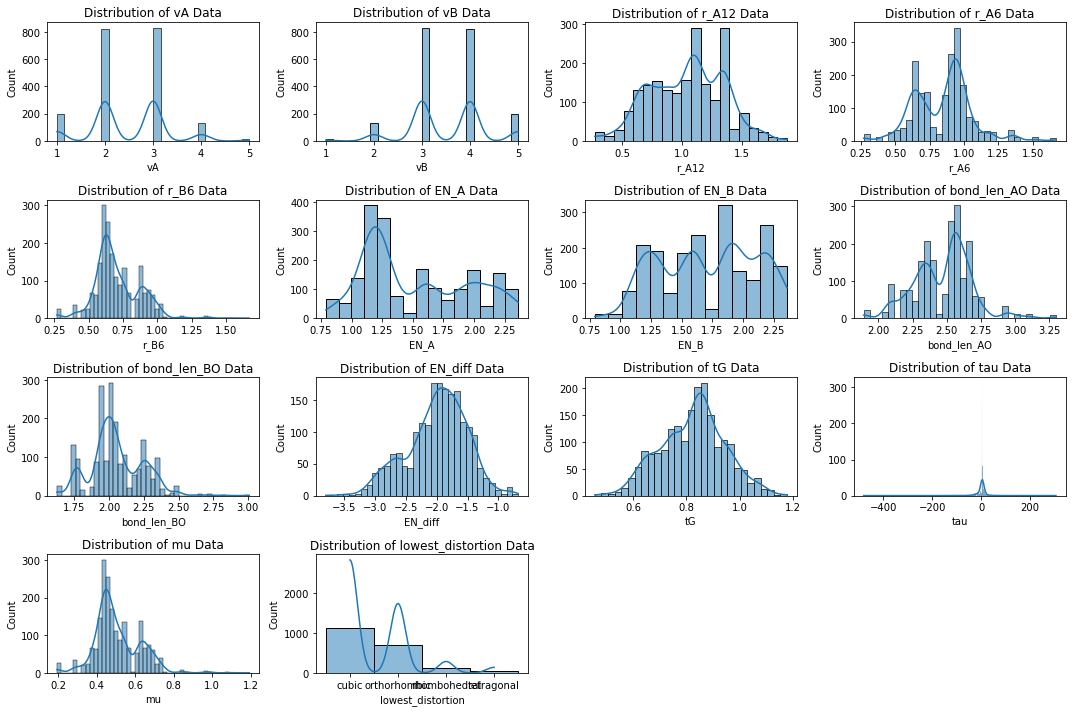

In [29]:
# Set up the figure size for the plot
plt.figure(figsize=(15,10))

# Iterate over each column in the dataframe
for i, col in enumerate(prv_train_tau.columns, 1):
    # Create subplots in a 4x4 grid
    plt.subplot(4, 4, i)
    
    # Set title for each subplot indicating the distribution of data for the corresponding column
    plt.title(f"Distribution of {col} Data")
    
    # Plot the histogram with kernel density estimation using seaborn's histplot function
    sns.histplot(prv_train_tau[col], kde=True)
    
    # Adjust subplot layout
    plt.tight_layout()
    
    # Ensure the plot is shown
    plt.plot()


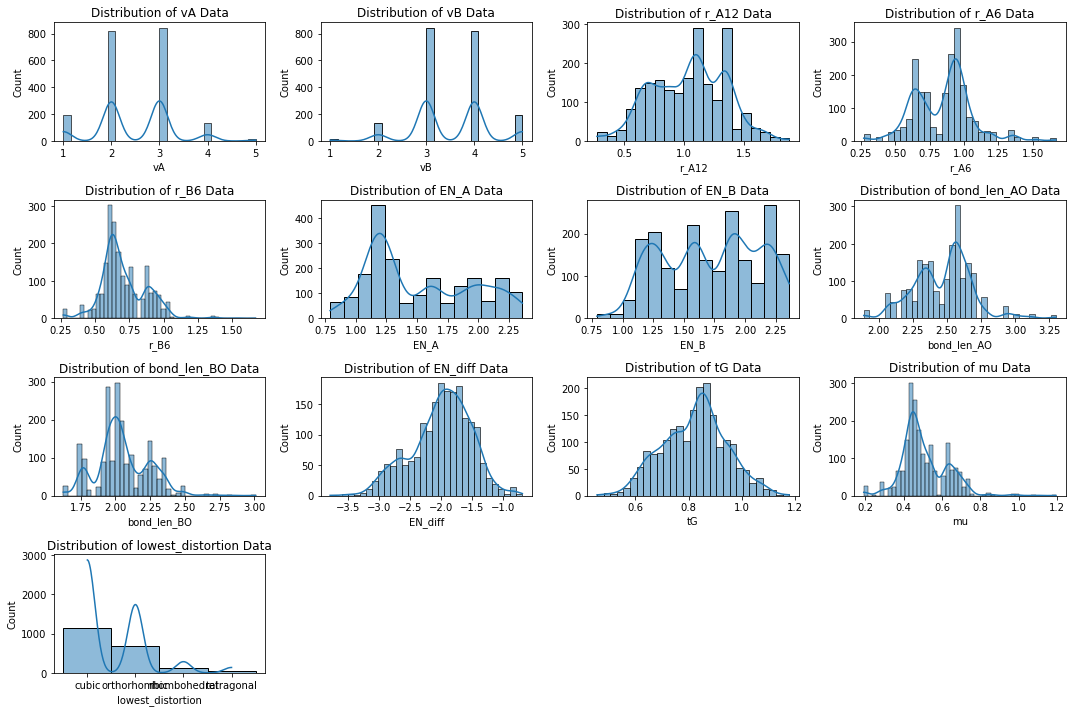

In [30]:
# Set up the figure size for the plot
plt.figure(figsize=(15,10))

# Iterate over each column in the dataframe
for i, col in enumerate(prv_train_no_tau.columns, 1):
    # Create subplots in a 4x4 grid
    plt.subplot(4, 4, i)
    
    # Set title for each subplot indicating the distribution of data for the corresponding column
    plt.title(f"Distribution of {col} Data")
    
    # Plot the histogram with kernel density estimation using seaborn's histplot function
    sns.histplot(prv_train_no_tau[col], kde=True)
    
    # Adjust subplot layout
    plt.tight_layout()
    
    # Ensure the plot is shown
    plt.plot()


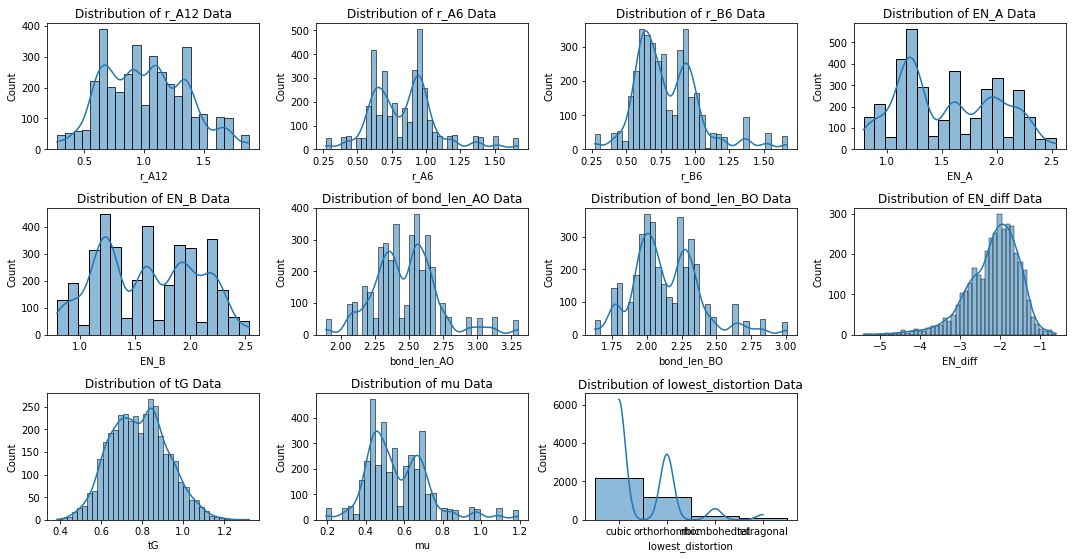

In [31]:
# Set up the figure size for the plot
plt.figure(figsize=(15,10))

# Iterate over each column in the dataframe
for i, col in enumerate(prv_train_no_tau_no_v.columns, 1):
    # Create subplots in a 4x4 grid
    plt.subplot(4, 4, i)
    
    # Set title for each subplot indicating the distribution of data for the corresponding column
    plt.title(f"Distribution of {col} Data")
    
    # Plot the histogram with kernel density estimation using seaborn's histplot function
    sns.histplot(prv_train_no_tau_no_v[col], kde=True)
    
    # Adjust subplot layout
    plt.tight_layout()
    
    # Ensure the plot is shown
    plt.plot()

At this point, there doesn't seem to be a need to standardize or normalize the data. 

Since the data already follows a Gaussian (normal) distribution, normalization might not provide significant benefits in terms of scaling the data to a fixed range. With this normally distributed data, standardization is a better choice, but doesn't seem necessary. Stanardization could be beneficial for maintaining the integrity of the data's distribution while making it more compatible with algorithms that expect standardized inputs.

(remember standard definitions)
Standardization transforms the data to have a mean of 0 and a standard deviation of 1, which can be advantageous for algorithms that assume a Gaussian distribution or rely on measures of central tendency and dispersion.

Standardization preserves the shape of the distribution of the data, including its normality, by centering it around zero and scaling it by the standard deviation. 


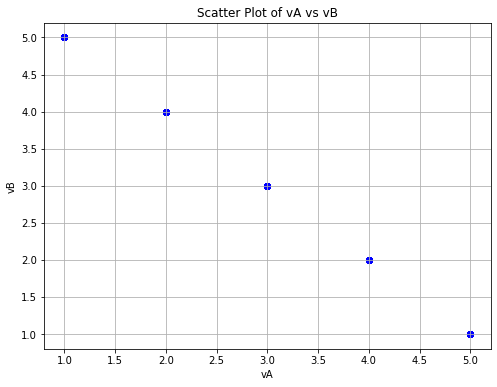

In [32]:
vA = prv_train_tau['vA']
vB = prv_train_tau['vB']
plt.figure(figsize=(8, 6))
plt.scatter(vA, vB, color='blue', alpha=0.5)
plt.xlabel('vA')
plt.ylabel('vB')
plt.title('Scatter Plot of vA vs vB')
plt.grid(True)
plt.show()

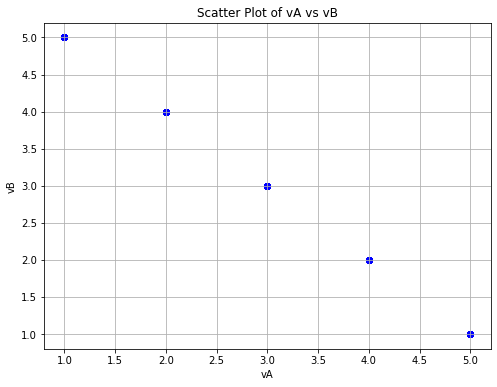

In [33]:
vA = prv_train_no_tau['vA']
vB = prv_train_no_tau['vB']
plt.figure(figsize=(8, 6))
plt.scatter(vA, vB, color='blue', alpha=0.5)
plt.xlabel('vA')
plt.ylabel('vB')
plt.title('Scatter Plot of vA vs vB')
plt.grid(True)
plt.show()

These plots show the linear relationship between the valence electrons. This explicitly shows that vA and vB add up to the constant 6.

dataset choice:

It appears at this point that the dataset that is the most comprehensive would be best suited to answer our shareholders questions.

In [34]:
X_tau = prv_train_tau.loc[:,'vA':'mu']
y_tau = prv_train_tau.loc[:,'lowest_distortion']
# X contains features and y contains labels/targets
# X_train and y_train will contain the training data, while X_test and y_test will contain the testing (holdout) data
X_train, X_test, y_train, y_test = train_test_split(X_tau,
y_tau, test_size=0.2, random_state=42)

# Here, test_size=0.2 specifies that 20% of the data will be held out for testing
# random_state is set for reproducibility, ensuring the same split is obtained each time you run the code
#don't touch the test data!!! (y_test you'll never have in real life so the holdout dataset represents the real life data that we won't ever have!)

In [35]:
len(X_train), len(X_test)

(1590, 398)

[]

<Figure size 1080x720 with 0 Axes>

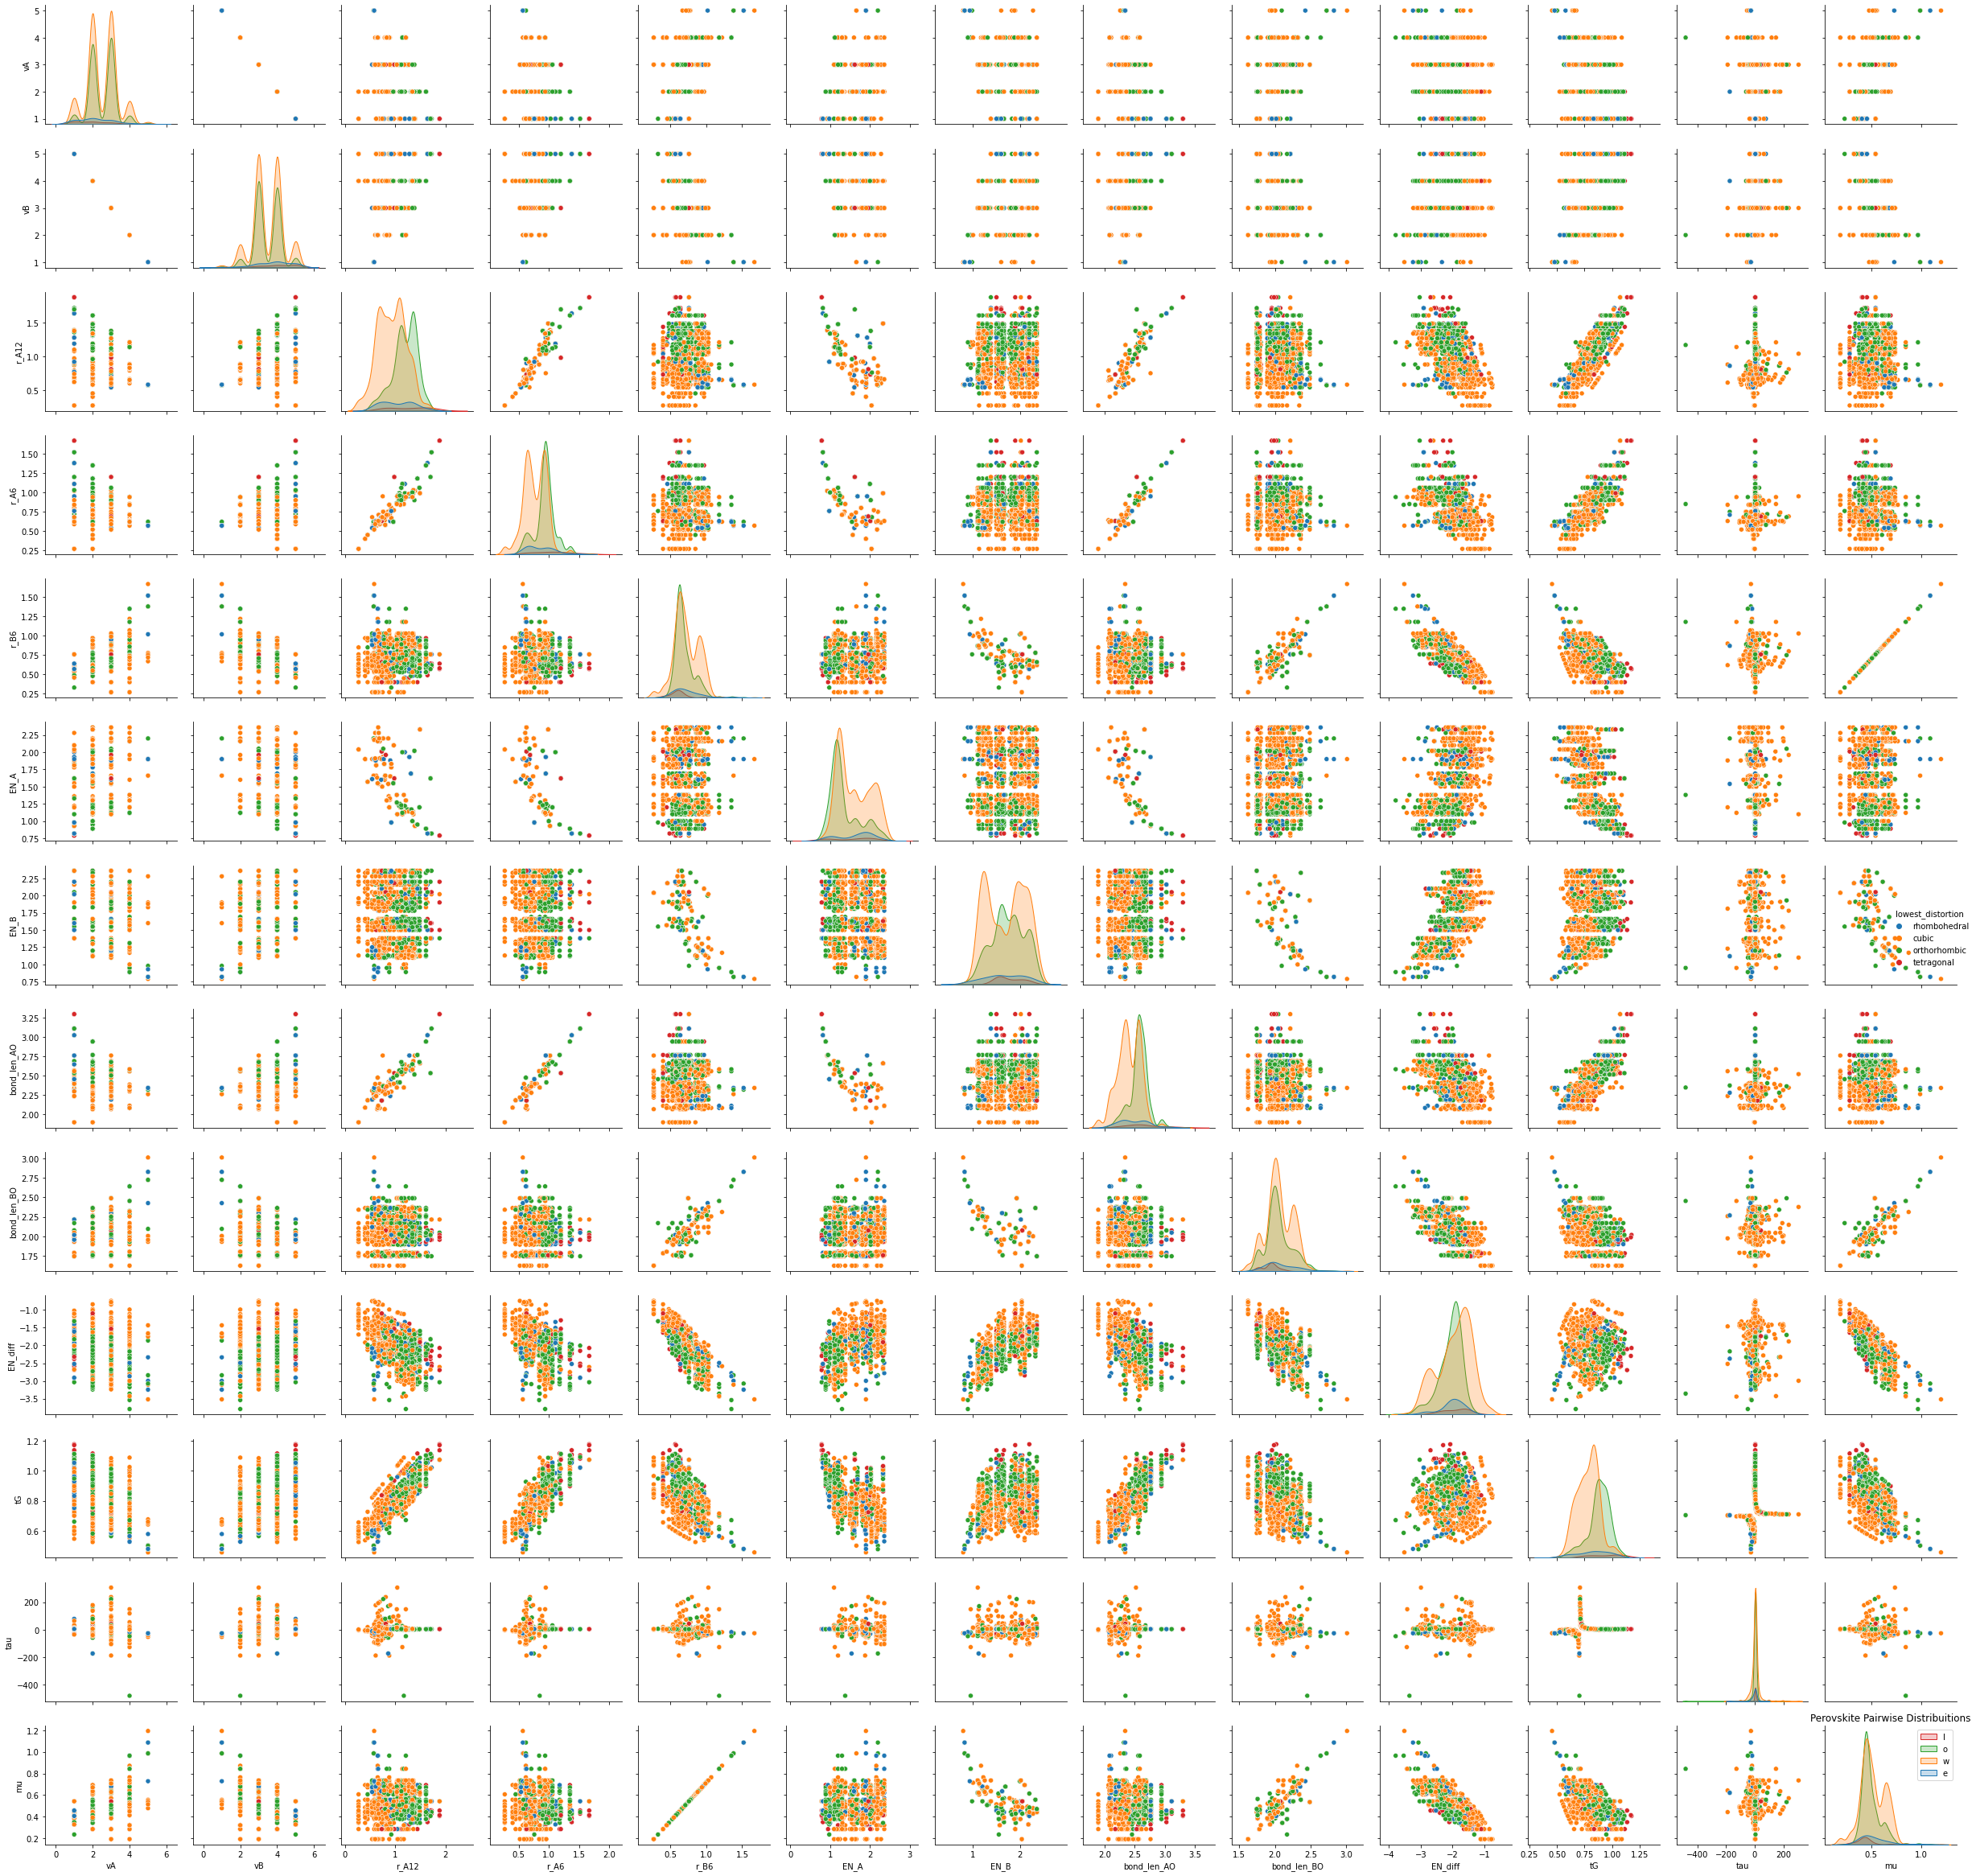

In [36]:
# X_train and y_train are training feature and target variables

# Concatenate X_train and y_train along columns
train_data = pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(15,10))
sns.pairplot(train_data,hue="lowest_distortion")
plt.title("Perovskite Pairwise Distribuitions")
plt.legend("lowest_distortion")
plt.tight_layout()
plt.plot()

This is the primary indicator showing linear relationships that need to be monitored. Say WHY most linear relationships are not good for ML models. (case by case basis, keep an eye on).

In [37]:
#Step 1, start training
kf = StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=X_train, y=y_train)):
    
    X_train_Kfold = X_train.iloc[trn_]
    y_train_Kfold = y_train.iloc[trn_]
    
    X_valid = X_train.iloc[val_]
    y_valid = y_train.iloc[val_]
    
    DTclf = DecisionTreeClassifier(criterion="entropy",max_depth = 10, random_state=42) #here is where we tune the hyperparameters
    DTclf.fit(X_train_Kfold, y_train_Kfold)
    y_pred_Kfold = DTclf.predict(X_valid)
    
    print(f"The fold is: {fold}:")
    print(classification_report(y_valid, y_pred_Kfold))

The fold is: 0:
              precision    recall  f1-score   support

       cubic       0.85      0.83      0.84       178
orthorhombic       0.69      0.77      0.72       113
rhombohedral       0.40      0.21      0.28        19
  tetragonal       0.33      0.38      0.35         8

    accuracy                           0.76       318
   macro avg       0.57      0.55      0.55       318
weighted avg       0.75      0.76      0.75       318

The fold is: 1:
              precision    recall  f1-score   support

       cubic       0.83      0.86      0.84       178
orthorhombic       0.76      0.71      0.73       112
rhombohedral       0.33      0.37      0.35        19
  tetragonal       0.38      0.33      0.35         9

    accuracy                           0.76       318
   macro avg       0.57      0.57      0.57       318
weighted avg       0.76      0.76      0.76       318

The fold is: 2:
              precision    recall  f1-score   support

       cubic       0.85    

These are the example kfold scores (no hyperparameterization) for each fold. Which score is most important (research) for now, guess f1 score. The closer this number is to 1 the better the model will be at predicting the target. The closer to a score of 1 means that the model is doing well in both minimizing false positives and false negatives because both the precision and recall are high scores are well. A model was trained once for each of the 5 folds. 

rhombohedral and tetragonal are training on little data so the scores are expected to be low compared to the cubic and orthorhombic which are training on a lot more data.

Here is a great opportunity to tune the hyperparameters and optimize the training before we begin try out different models. (calling the fit function trains the model)

In [39]:
start_time = time.time()

N_SEED = 42

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=N_SEED)
DTclf = DecisionTreeClassifier(random_state=N_SEED)
# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_cv = GridSearchCV(
    estimator=DTclf,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=cv)

grid_search_cv.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print("Grid search completed in {:.2f} seconds".format(elapsed_time))

print(grid_search_cv.best_params_)

#because the data set is so small, it seems like tuning hyperparameters may
#not make a huge difference so we won't even know if the scores are really good or not.

Grid search completed in 0.51 seconds
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


The hyperparameters can change each time GridSearchCV is run due to the nature of the algorithm and the way the search is performed. 

There is randomness in the search process. Some hyperparameter optimization techniques, especially randomized search algorithms, introduce randomness in the search process. This randomness can lead to different hyperparameter combinations being explored each time the search is run.

The randomness in data splitting: because of the cross-validation, the data is being split into multiple folds. The way the data is split can introduce randomness, especially because the dataset is small.

To ensure reproducibility, the random seed can be set to use a random_state parameter wherever applicable, which will make the random number generation deterministic. Additionally, the n_jobs parameter can be set to 1 to avoid parallelization if reproducibility is crucial.



Summary -this ran so fast! This does a stratfiedkfolds is a measure of how well your model is doing. The gridsearch does a stratifiedkfold measurement for each combination of of parameters in the parameter grid. That grid search is used over all of the parameters to determine the optimal hyper parameters. using the -1 says to use all available processors and so this classifier was able to run very efficiently!
Running a stratified kfold for each parameter in the grid. It then suggests the best parameters to use in the model for the highest accuracy.

This hyperparameter tuning is interesting. It could be assumed that unlimited depth (layers/decisions on each branch of the tree) in a tree would be best at producing the highest accuracy, but in this case the hypertuning suggests that only 15 tree layers are needed to optimize the model.

The next step will be to train all of the training data not just a piece (split).

In [40]:
all_DTclf = DecisionTreeClassifier(criterion="entropy",max_depth = 15, random_state=42, min_samples_leaf=1, min_samples_split=2) #random state maintains reproducibility. Use the tuned hyperparameters
all_DTclf.fit(X_train, y_train) #last step of training
    

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42)

In [41]:
#does the prediction x data match real-life y?

#step 1 apply the holdout data(the holdout data)
y_pred_final_DT = all_DTclf.predict(X_test) 

#step 2 assess the performance of the classifier

#shows the number of true positives, true negatives, false positives, and false negatives.
DTconf_matrix = confusion_matrix(y_test, y_pred_final_DT)
print("Confusion Matrix:\n", DTconf_matrix)


Confusion Matrix:
 [[212  22   1   1]
 [ 26  98   5   2]
 [  6   5   9   0]
 [  4   0   2   5]]


Each row represents the actual class, while each column represents the predicted class.
The value in the first row and first column (212) represents the number of instances where the actual class is 0 and the classifier correctly predicted it as 0 (true negatives).
The value in the second row and first column (26) represents the number of instances where the actual class is 1 but the classifier wrongly predicted it as 0 (false negatives).
The value in the first row and second column (22) represents the number of instances where the actual class is 0 but the classifier wrongly predicted it as 1 (false positives).
The value in the second row and second column (98) represents the number of instances where the actual class is 1 and the classifier correctly predicted it as 1 (true positives).
Similarly, the other values follow the same pattern for their respective classes.

To sum it up-

The diagonal elements (from top-left to bottom-right) represent the number of correctly classified instances for each class.
Off-diagonal elements represent misclassifications.
The higher the values on the diagonal, the better the classifier's performance for each class.

It would appear that the classifier is only able to classify cubic shape with the most accuracy - it's optimized for this shape. This makes sense because the majority of the data points relate to the cubic shape. 

In [42]:
#still step 2, measures the proportion of correctly classified instances out of the total instances.
DTaccuracy = accuracy_score(y_test, y_pred_final_DT)
print("Accuracy:", DTaccuracy)


Accuracy: 0.8140703517587939


In [43]:
#still step 2, These metrics provide insights into the classifier's performance, especially when dealing with imbalanced classes.
DTreport = classification_report(y_test, y_pred_final_DT)
print("Classification Report:\n", DTreport)


Classification Report:
               precision    recall  f1-score   support

       cubic       0.85      0.90      0.88       236
orthorhombic       0.78      0.75      0.77       131
rhombohedral       0.53      0.45      0.49        20
  tetragonal       0.62      0.45      0.53        11

    accuracy                           0.81       398
   macro avg       0.70      0.64      0.66       398
weighted avg       0.81      0.81      0.81       398



this supports the conclusion above with the confusion matrix. This is reasonable given the size of the data set and the simplicity of the decision tree model.

potentially, a feature could be dropped and this may improve the accuracy of the model. 

To maintain the integrity of the hold out data, not over fitting (trying to get a perfect score) to the hold out data is essential. It IS possible to go back and do some feature engineering as long as the hold out data split is also changed. That way the simulated real-life data used for the confusion matrix is truly new data each time and not the exact same data over and over, thus simulating real-life data.

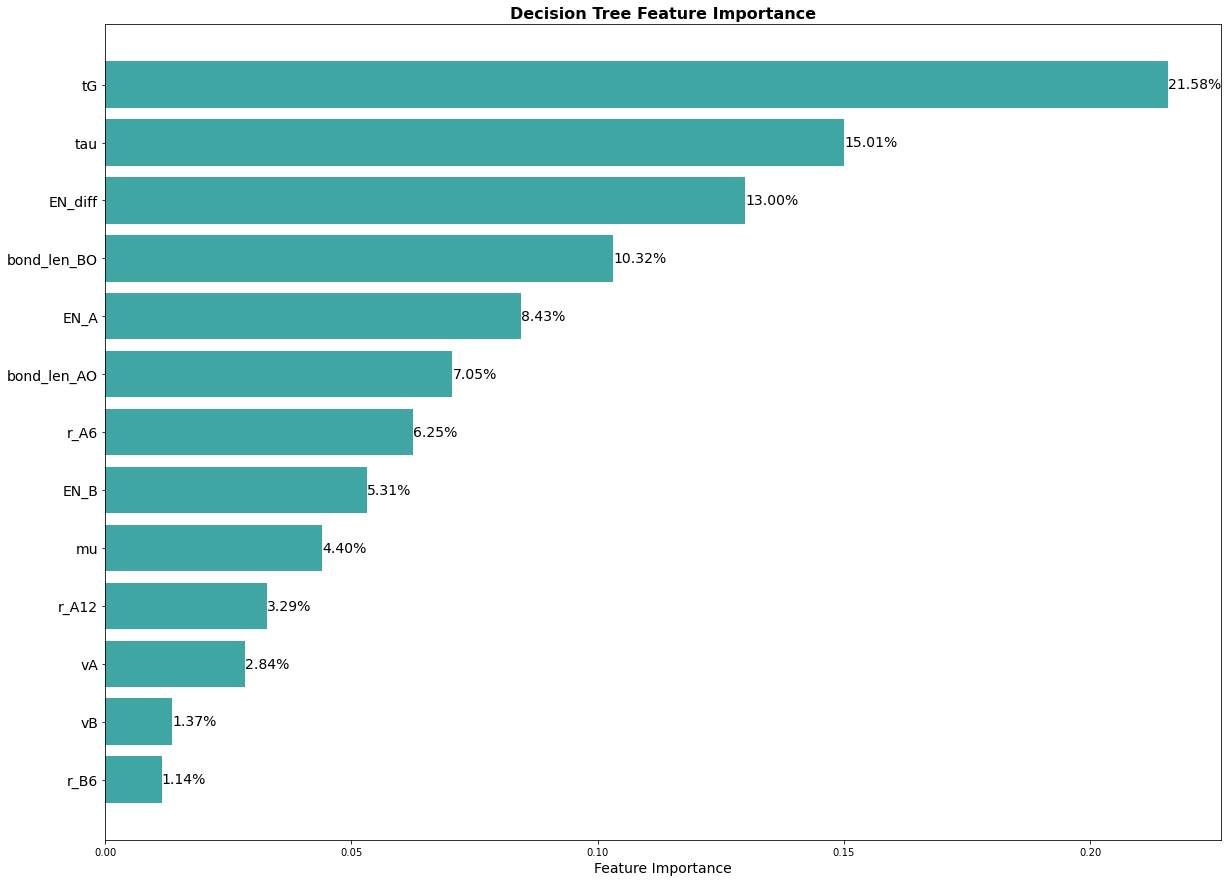

In [45]:
#Step 3, feature importance and printing a visualization

## Checking Feature importance 

plt.figure(figsize=(20, 15))
DTimportance = all_DTclf.feature_importances_
idxs = np.argsort(DTimportance)
plt.title("Decision Tree Feature Importance", fontsize=16, fontweight='bold')
bars = plt.barh(range(len(idxs)), DTimportance[idxs], align="center", color='#40A6A3')
plt.yticks(range(len(idxs)), [X_train.columns[i] for i in idxs], fontsize=14)  # Assuming X_train is a DataFrame
plt.xlabel("Feature Importance", fontsize=14)

# Add percentage labels to the bars
for i, bar in zip(idxs, bars):
    yval = DTimportance[i]
    plt.text(yval, bar.get_y() + bar.get_height()/2, "{:.2%}".format(yval), va='center', fontsize=14)

plt.show()





next time - from the gridsearch extract the actual scores. need this to compare the decision tree and random forest.


In [46]:
#start over! #Step 1, start training a different type of algorithm
kf = StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=X_train, y=y_train)):
    
    X_train_Kfold = X_train.iloc[trn_]
    y_train_Kfold = y_train.iloc[trn_]
    
    X_valid = X_train.iloc[val_]
    y_valid = y_train.iloc[val_]
    
    RFclf=RandomForestClassifier(n_estimators=200,criterion="entropy") #here is where we tune the hyperparameters
    RFclf.fit(X_train_Kfold, y_train_Kfold)
    y_pred_Kfold = RFclf.predict(X_valid)
    
    print(f"The fold is: {fold}:")
    print(classification_report(y_valid, y_pred_Kfold))

The fold is: 0:
              precision    recall  f1-score   support

       cubic       0.88      0.92      0.90       178
orthorhombic       0.76      0.81      0.79       113
rhombohedral       0.50      0.16      0.24        19
  tetragonal       0.75      0.38      0.50         8

    accuracy                           0.82       318
   macro avg       0.72      0.57      0.61       318
weighted avg       0.81      0.82      0.81       318

The fold is: 1:
              precision    recall  f1-score   support

       cubic       0.85      0.90      0.88       178
orthorhombic       0.77      0.79      0.78       112
rhombohedral       0.73      0.42      0.53        19
  tetragonal       1.00      0.33      0.50         9

    accuracy                           0.82       318
   macro avg       0.84      0.61      0.67       318
weighted avg       0.82      0.82      0.81       318

The fold is: 2:
              precision    recall  f1-score   support

       cubic       0.88    

In [47]:
#next step, hyperparameter tuning
start_time = time.time()
N_SEED = 42
  
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=N_SEED)
RFclf = RandomForestClassifier(random_state=N_SEED)
# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'n_estimators': [50, 150, 200, 500] 
}

grid_search_cv = GridSearchCV(
    estimator=RFclf,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=cv)

grid_search_cv.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print("Grid search completed in {:.2f} seconds".format(elapsed_time))

print(grid_search_cv.best_params_)

#because the data set is so small, it seems like tuning hyperparameters may
#not make a huge difference so we won't even know if the scores are really good or not.

Grid search completed in 74.21 seconds
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


In [48]:
all_RFclf = RandomForestClassifier(criterion="entropy",max_depth = None, random_state=42, min_samples_leaf=1, min_samples_split=5, n_estimators=500) #random state maintains reproducibility. Use the tuned hyperparameters
all_RFclf.fit(X_train, y_train) #last step of training
    

RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=500, random_state=42)

In [49]:
#does the prediction x data match real-life y?

#step 1 apply the holdout data(the holdout data)
y_pred_final_RF = all_RFclf.predict(X_test) 

#step 2 assess the performance of the classifier

#shows the number of true positives, true negatives, false positives, and false negatives.
RFconf_matrix = confusion_matrix(y_test, y_pred_final_RF)
print("Confusion Matrix:\n", RFconf_matrix)


Confusion Matrix:
 [[220  15   0   1]
 [ 21 108   1   1]
 [  7   4   9   0]
 [  4   0   3   4]]


This matrix is better. The error in row 2 decreased from about 1/3 to 1/5. 

In [50]:
#still step 2, measures the proportion of correctly classified instances out of the total instances.
RFaccuracy = accuracy_score(y_test, y_pred_final_RF)
print("Accuracy:", RFaccuracy)

Accuracy: 0.8567839195979899


In [51]:
#still step 2, These metrics provide insights into the classifier's performance, especially when dealing with imbalanced classes.
RFreport = classification_report(y_test, y_pred_final_RF)
print("Classification Report:\n", RFreport)


Classification Report:
               precision    recall  f1-score   support

       cubic       0.87      0.93      0.90       236
orthorhombic       0.85      0.82      0.84       131
rhombohedral       0.69      0.45      0.55        20
  tetragonal       0.67      0.36      0.47        11

    accuracy                           0.86       398
   macro avg       0.77      0.64      0.69       398
weighted avg       0.85      0.86      0.85       398



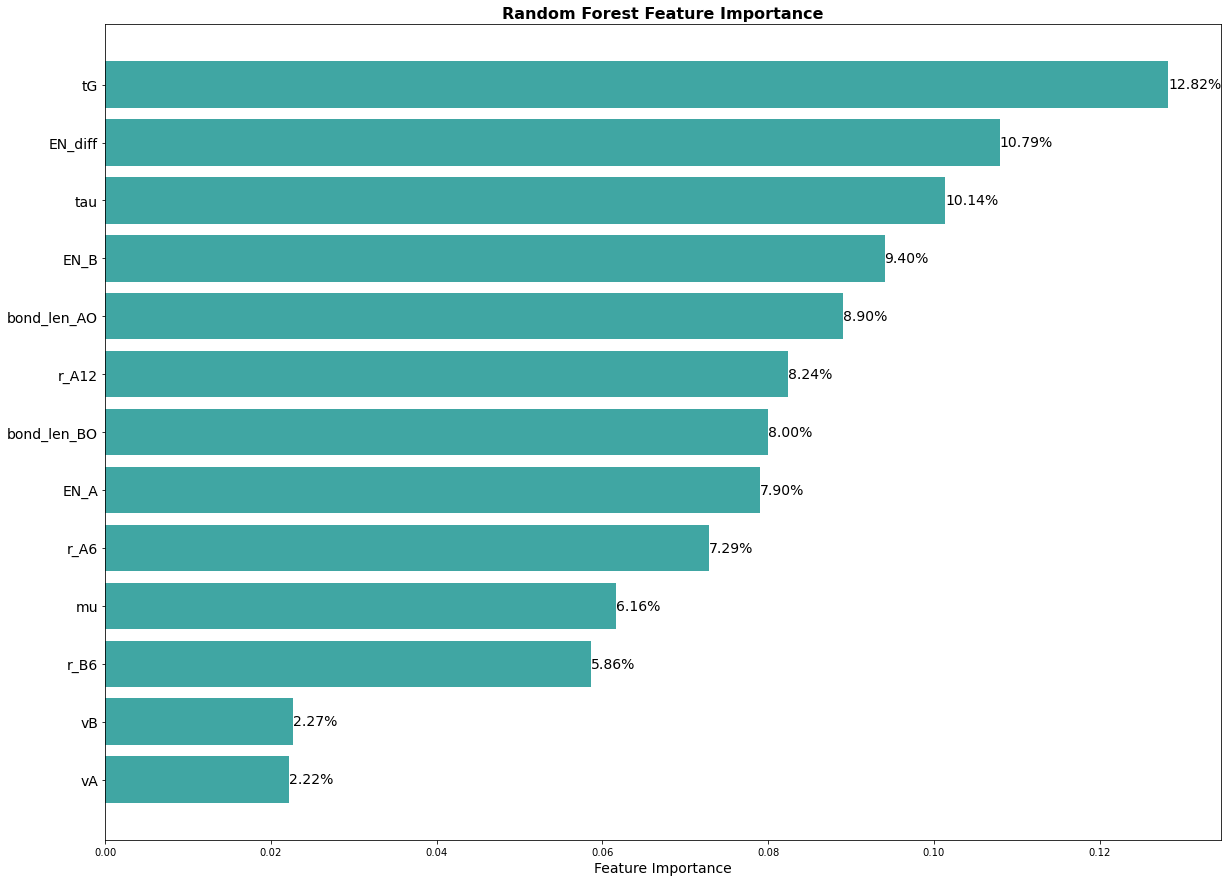

In [53]:
#Step 3, feature importance and printing a visualization

## Checking Feature importance 

plt.figure(figsize=(20, 15))
RFimportance = all_RFclf.feature_importances_
idxs = np.argsort(RFimportance)
plt.title("Random Forest Feature Importance", fontsize=16, fontweight='bold')
bars = plt.barh(range(len(idxs)), RFimportance[idxs], align="center", color='#40A6A3')
plt.yticks(range(len(idxs)), [X_train.columns[i] for i in idxs], fontsize=14)  # Assuming X_train is a DataFrame
plt.xlabel("Feature Importance", fontsize=14)

# Add percentage labels to the bars
for i, bar in zip(idxs, bars):
    yval = RFimportance[i]
    plt.text(yval, bar.get_y() + bar.get_height()/2, "{:.2%}".format(yval), va='center', fontsize=14)

plt.show()


This output shows much closer percentages for the top features. This may be highlighting some linear relationships. This will be investigated further later on.

There are three scenarios when evaluating the pairwise plot: both features are high importance, both are low importance, and one is high importance.

In [56]:
#third model, Hyperparameter Tuning

# Define the list of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Define hyperparameters grid for each kernel
param_grids = {
    'linear': {'C': [0.1, 1, 10, 100]},
    'poly': {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4]},
    'rbf': {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]},
    'sigmoid': {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}
}

for kernel in kernels:
    print(f"Tuning hyperparameters for SVM with {kernel} kernel")
    
    start_time = time.time()
    
    # Define SVM classifier
    SVMclf = SVC(kernel=kernel)
    
    # Define hyperparameters grid
    param_grid = param_grids[kernel]
    
    # Perform grid search
    grid_search_cv = GridSearchCV(
        estimator=SVMclf,
        param_grid=param_grid,
        scoring='accuracy',
        n_jobs=-1,
        cv=cv
    )
    
    grid_search_cv.fit(X_train, y_train)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Grid search for {} kernel completed in {:.2f} seconds".format(kernel, elapsed_time))
    
    print(f"Best parameters for {kernel} kernel: {grid_search_cv.best_params_}")


Tuning hyperparameters for SVM with linear kernel
Grid search for linear kernel completed in 886.46 seconds
Best parameters for linear kernel: {'C': 100}
Tuning hyperparameters for SVM with poly kernel
Grid search for poly kernel completed in 75.70 seconds
Best parameters for poly kernel: {'C': 100, 'degree': 3}
Tuning hyperparameters for SVM with rbf kernel
Grid search for rbf kernel completed in 0.76 seconds
Best parameters for rbf kernel: {'C': 10, 'gamma': 10}
Tuning hyperparameters for SVM with sigmoid kernel
Grid search for sigmoid kernel completed in 0.38 seconds
Best parameters for sigmoid kernel: {'C': 10, 'gamma': 0.01}


In [57]:
#assess the performance of each SVM classifier with different kernels using cross-validation
start_time = time.time()
# Define SVM classifiers with the best parameters for each kernel
svm_linear = SVC(kernel='linear', C=100)
svm_poly = SVC(kernel='poly', C=100, degree=3)
svm_rbf = SVC(kernel='rbf', C=10, gamma=10)
svm_sigmoid = SVC(kernel='sigmoid', C=10, gamma=0.01)

# Perform cross-validation for each SVM classifier
svm_linear_scores = cross_val_score(svm_linear, X_train, y_train, cv=5)
svm_poly_scores = cross_val_score(svm_poly, X_train, y_train, cv=5)
svm_rbf_scores = cross_val_score(svm_rbf, X_train, y_train, cv=5)
svm_sigmoid_scores = cross_val_score(svm_sigmoid, X_train, y_train, cv=5)

end_time = time.time()
    elapsed_time = end_time - start_time
    print("Grid search for {} kernel completed in {:.2f} seconds".format(kernel, elapsed_time))
    

# Print average cross-validation scores
print("Average cross-validation scores:")
print(f"Linear SVM: {svm_linear_scores.mean()}")
print(f"Polynomial SVM: {svm_poly_scores.mean()}")
print(f"RBF SVM: {svm_rbf_scores.mean()}")
print(f"Sigmoid SVM: {svm_sigmoid_scores.mean()}")


Average cross-validation scores:
Linear SVM: 0.7132075471698112
Polynomial SVM: 0.5610062893081761
RBF SVM: 0.7874213836477988
Sigmoid SVM: 0.6553459119496855


These scores provide insights into how well each SVM classifier generalizes to unseen data. 

The best performing SVM classifer is RBF SVM. 

Ranking the SVM classifiers in order of performance from best to worst would be

RBF (Gaussian), Linear, Sigmoid, Polynomial 

In [61]:
#Model Training

start_time = time.time()

# Train SVM classifiers with the best hyperparameters for each kernel
svm_linear_best = SVC(kernel='linear', C=grid_search_cv.best_params_['C'])
svm_rbf_best = SVC(kernel='rbf', C=grid_search_cv.best_params_['C'], gamma=grid_search_cv.best_params_['gamma'])
svm_sigmoid_best = SVC(kernel='sigmoid', C=grid_search_cv.best_params_['C'], gamma=grid_search_cv.best_params_['gamma'])

svm_linear_best.fit(X_train, y_train)
svm_rbf_best.fit(X_train, y_train)
svm_sigmoid_best.fit(X_train, y_train)

# Check if the polynomial kernel was selected as the best model
if 'C' in grid_search_cv.best_params_:
    svm_poly_best = SVC(kernel='poly', C=grid_search_cv.best_params_['C'])
    svm_poly_best.fit(X_train, y_train)
else:
    print("Polynomial kernel was not selected as the best model during grid search.")

# Model Evaluation

# Evaluate the trained SVM classifiers on the test set
svm_linear_accuracy = svm_linear_best.score(X_test, y_test)
svm_rbf_accuracy = svm_rbf_best.score(X_test, y_test)
svm_sigmoid_accuracy = svm_sigmoid_best.score(X_test, y_test)

print("Accuracy on the test set:")
print(f"Linear SVM: {svm_linear_accuracy}")
print(f"RBF SVM: {svm_rbf_accuracy}")
print(f"Sigmoid SVM: {svm_sigmoid_accuracy}")

end_time = time.time()
elapsed_time = end_time - start_time
print("Grid search for {} kernel completed in {:.2f} seconds".format(kernel, elapsed_time))
    


Accuracy on the test set:
Linear SVM: 0.6984924623115578
RBF SVM: 0.7135678391959799
Sigmoid SVM: 0.6155778894472361
Grid search for sigmoid kernel completed in 316.35 seconds


Instead of training all models individually, I may explore ensemble methods that combine predictions from multiple models. 

Ensemble methods include: 
bagging 
boosting 
stacking 

These can lead to improved performance compared to individual models. In this case, I might focus on training a diverse set of base models to use in the ensemble.

In [63]:
# More Model Evaluation

start_time = time.time()
# Confusion matrix and classification report for each SVM classifier
svm_classifiers = {
    'Linear SVM': svm_linear_best,
    'Polynomial SVM': svm_poly_best,
    'RBF SVM': svm_rbf_best,
    'Sigmoid SVM': svm_sigmoid_best
}

for name, clf in svm_classifiers.items():
    print(f"\nEvaluation metrics for {name}:")
    y_pred = clf.predict(X_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
end_time = time.time()
elapsed_time = end_time - start_time
print("Grid search for {} kernel completed in {:.2f} seconds".format(kernel, elapsed_time))
    


Evaluation metrics for Linear SVM:
Confusion Matrix:
[[189  47   0   0]
 [ 42  89   0   0]
 [ 11   9   0   0]
 [  3   8   0   0]]

Classification Report:
              precision    recall  f1-score   support

       cubic       0.77      0.80      0.79       236
orthorhombic       0.58      0.68      0.63       131
rhombohedral       0.00      0.00      0.00        20
  tetragonal       0.00      0.00      0.00        11

    accuracy                           0.70       398
   macro avg       0.34      0.37      0.35       398
weighted avg       0.65      0.70      0.67       398


Evaluation metrics for Polynomial SVM:
Confusion Matrix:
[[236   0   0   0]
 [131   0   0   0]
 [ 19   1   0   0]
 [ 11   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

       cubic       0.59      1.00      0.75       236
orthorhombic       0.00      0.00      0.00       131
rhombohedral       0.00      0.00      0.00        20
  tetragonal       0.00      0.00 

/Users/Erin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/Erin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/Erin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/Erin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

P

In [64]:
#Feature Importance

# Retrieve coefficients for linear SVM
linear_coef = svm_linear_best.coef_

# Create a dictionary mapping feature names to their coefficients
feature_importance_linear = dict(zip(X_train.columns, linear_coef[0]))

# Sort the features by their coefficients (importance)
sorted_features_linear = sorted(feature_importance_linear.items(), key=lambda x: abs(x[1]), reverse=True)

# Print feature importance
print("Feature Importance for Linear SVM:")
for feature, coef in sorted_features_linear:
    print(f"{feature}: {coef}")


Feature Importance for Linear SVM:
EN_diff: -8.267864499288407
r_B6: -7.412498819606299
r_A12: -7.258347608762961
mu: -5.2946421503743295
EN_B: 3.7495572923708096
bond_len_AO: -2.1560117595727206
EN_A: 1.9555606665799132
tG: -1.8868731686447973
bond_len_BO: -1.4102351736673882
vA: -0.20688498853814963
vB: 0.20688498853633064
r_A6: -0.1526318133987843
tau: 0.00469517130022723


EN_diff: This feature has a negative importance score, indicating that increasing values of EN_diff tend to decrease the predictive performance of the model.
r_B6: increasing values of r_B6 also have a negative impact on the model's performance.
r_A12: Increasing values of r_A12 negatively affect the model's performance.
mu: Higher values of mu have a negative impact on the model's performance.
EN_B: This feature has a positive importance score, indicating that increasing values of EN_B tend to improve the model's performance.
bond_len_AO: Increasing values of bond_len_AO have a negative impact on the model's performance.
EN_A: Higher values of EN_A have a positive impact on the model's performance.
tG: Increasing values of tG tend to decrease the model's performance.
bond_len_BO: Higher values of bond_len_BO have a negative impact on the model's performance.
vA: This feature has a slightly negative importance score.
vB: This feature has a slightly positive importance score.
r_A6: Increasing values of r_A6 slightly decrease the model's performance.
tau: This feature has a very small positive importance score.

For non-linear SVM models (e.g., polynomial, RBF, sigmoid), interpreting feature importance in terms of coefficients is not applicable because these models do not directly produce coefficients like linear SVMs. 

I'll try one of these methods: 

Kernel Methods: For non-linear SVMs, the decision function is often represented in terms of support vectors and their corresponding weights. These support vectors represent instances from the training data that are critical for defining the decision boundary. Analyzing the support vectors can provide some understanding of which features are influential in separating different classes.

Permutation Importance: Permutation importance is a model-agnostic technique that measures the increase in model error when a feature's values are randomly shuffled. By permuting feature values and observing the impact on model performance, you can assess the importance of each feature. This technique is applicable to any machine learning model, including SVMs.

In [67]:
# Calculate permutation importance for each SVM classifier
svm_importance = {}

for name, clf in svm_classifiers.items():
    result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
    svm_importance[name] = result.importances_mean
#The n_repeats parameter determines how many times each feature 
#is shuffled to compute the permutation importance.
#feature importance scores are printed for each feature in 
#each SVM classifier.
    
    
# Print feature importance for each SVM classifier
for name, importance in svm_importance.items():
    print(f"\nFeature Importance for {name}:")
    for i, (feature, importance_score) in enumerate(zip(X_test.columns, importance)):
        print(f"{i + 1}. {feature}: {importance_score}")



Feature Importance for Linear SVM:
1. vA: 0.009045226130653306
2. vB: 0.009045226130653306
3. r_A12: 0.24723618090452262
4. r_A6: 0.002261306532663354
5. r_B6: 0.08994974874371862
6. EN_A: 0.10577889447236184
7. EN_B: 0.1512562814070352
8. bond_len_AO: 0.040201005025125656
9. bond_len_BO: 0.004271356783919622
10. EN_diff: 0.1520100502512563
11. tG: 0.012562814070351768
12. tau: -0.0005025125628140503
13. mu: 0.04070351758793973

Feature Importance for Polynomial SVM:
1. vA: 0.0017587939698492816
2. vB: 0.0
3. r_A12: 0.0
4. r_A6: 0.0
5. r_B6: 0.0
6. EN_A: 0.0
7. EN_B: 0.0
8. bond_len_AO: 0.0
9. bond_len_BO: 0.0010050251256281562
10. EN_diff: 0.0
11. tG: 0.0
12. tau: 0.00025125628140705293
13. mu: 0.0

Feature Importance for RBF SVM:
1. vA: 0.016582914572864295
2. vB: 0.016582914572864295
3. r_A12: 0.02035175879396982
4. r_A6: -0.0007537688442211254
5. r_B6: 0.005276381909547712
6. EN_A: 0.0005025125628140503
7. EN_B: 0.017587939698492427
8. bond_len_AO: 0.0005025125628140614
9. bond_le

References:
1. https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem#Exploratory-Data-Analysis
2. https://www.kaggle.com/datasets/meetnagadia/crystal-structure-dataset?resource=download
3. https://www.sciencedirect.com/topics/engineering/perovskite-structure#:~:text=As%20shown%20in%20Figure%203,a%20total%20charge%20of%20%2B6.
4. https://en.wikipedia.org/wiki/Perovskite_(structure)
5. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
6. https://www.nanowerk.com/what-are-perovskites.php
7. https://github.com/scikit-learn/scikit-learn/issues/22230
8. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
9. 

